In [9]:
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from extra_geom import AGIPD_1MGeometry
from extra_geom import agipd_asic_seams
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

In [2]:
geom_fn = "./agipd_2934_v6_121.geom"
geom = AGIPD_1MGeometry.from_crystfel_geom(geom_fn)

In [4]:
clen = 0.1212 # meter
photon_energy = 9.35 # keV
wavelength = (12.3984/photon_energy)*1e-10 # meter
ai = AzimuthalIntegrator(detector=geom.to_pyfai_detector(), dist=clen, wavelength=wavelength)

In [11]:
module_mask = agipd_asic_seams()
all_modules_mask = np.repeat(module_mask[np.newaxis], 16, axis=0)

In [27]:
h5_fn = "./p2934_bg.h5"
h5 = h5py.File(h5_fn,"r")
data = h5["data"][0]

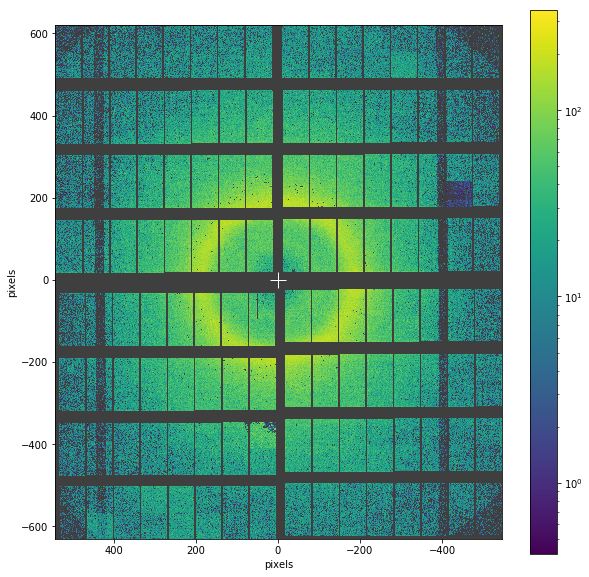

In [35]:
geom.plot_data(data,norm=mpl.colors.LogNorm())

In [46]:
matplotlib notebook

<IPython.core.display.Javascript object>


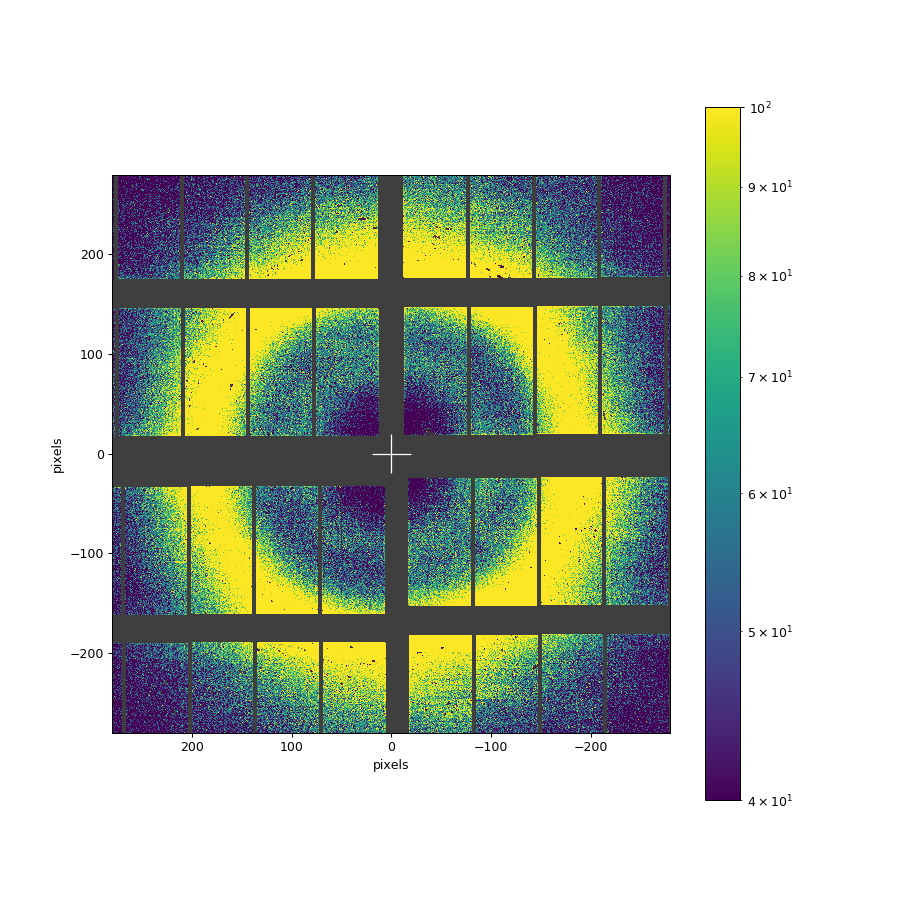

(-280, 280)

In [74]:
# geom.plot_data(data,norm=mpl.colors.LogNorm(),vmax=1e2
geom.plot_data(data*~all_modules_mask,norm=mpl.colors.LogNorm(),vmin=4e1,vmax=1e2)

plt.xlim(280,-280)
plt.ylim(-280, 280)

In [22]:
data.shape

(16, 512, 128)

(20, 189.34555187225342)

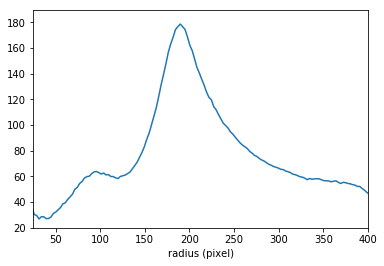

In [43]:
rint, I = ai.integrate1d(
    data.reshape(16*512, 128),
    mask = all_modules_mask.reshape(16*512,128),
    npt=300,
    unit="r_mm",
)
plt.plot(rint/0.2, I)
plt.xlabel('radius (pixel)')
plt.xlim(25,400)
plt.ylim(bottom=20)

Text(0.5, 0, 'radius (mm)')

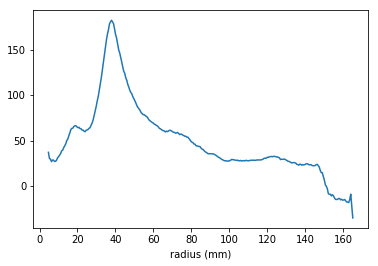

In [28]:
rint, I = ai.integrate1d(
    data.reshape(16*512, 128),
    npt=300,
    unit="r_mm",
)
plt.plot(rint, I)
plt.xlabel('radius (mm)')

Text(0.5, 0, 'radius (mm)')

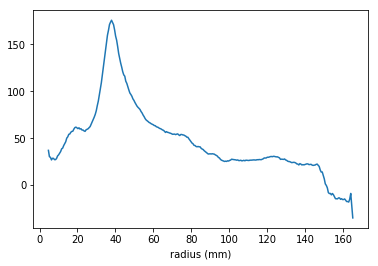

In [29]:
data = h5["data"][0]*~all_modules_mask
rint, I = ai.integrate1d(
    data.reshape(16*512, 128),
    npt=300,
    unit="r_mm",
)
plt.plot(rint, I)
plt.xlabel('radius (mm)')

<IPython.core.display.Javascript object>


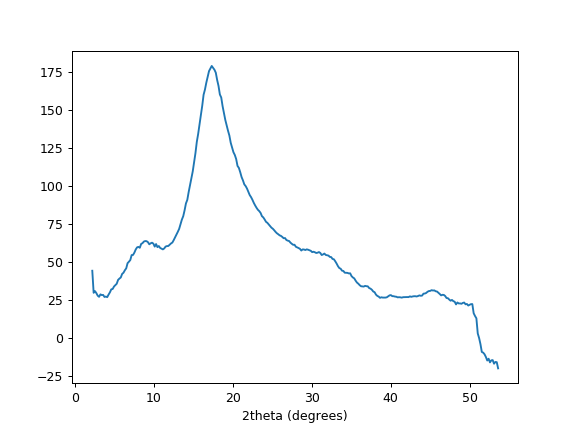

Text(0.5, 0, '2theta (degrees)')

In [78]:
rint, I = ai.integrate1d(
    data.reshape(16*512, 128),
    mask = all_modules_mask.reshape(16*512,128),
    npt=300,
    unit="2th_deg",
)
plt.figure()
plt.plot(rint, I)
plt.xlabel('2theta (degrees)')

<IPython.core.display.Javascript object>


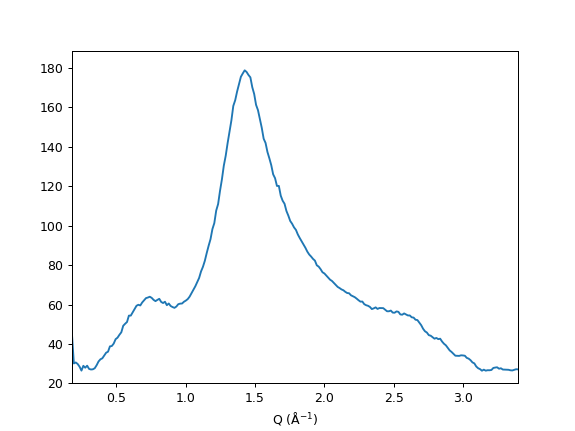

(20, 188.50983734130858)

In [89]:
# data = h5["data"][0]
rint, I = ai.integrate1d(
    data.reshape(16*512, 128),
    mask = all_modules_mask.reshape(16*512,128),
    npt=300,
    unit="q_A^-1",
)
plt.figure()
plt.plot(rint, I)
plt.xlabel(r'$\rm Q\ (\AA^{-1})$')
plt.xlim(0.18,3.4)
plt.ylim(bottom=20)

In [90]:
with h5py.File("1D_profile.h5","w") as h5out:
    h5out["Q"] = rint
    h5out["intensity"] = I